In [1]:
import pandas as pd
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
dataset=pd.read_csv("Order - Copy.csv")
dataset.shape

(13135, 12)

In [3]:
dataset

,CustomerCode,CountryName,Amount,ITEM_NAME,ColorName,ShapeName,AreaFt,QtyRequired,TotalArea,QualityName,DesignName,AreaMtr
0,H-1,USA,769.5,HAND TUFTED,GREEN/IVORY,REC,128.2500,6,128.25,TUFTED 30C HARD TWIST,OLD LONDON [3715],11.5425
1,H-1,USA,702.0,HAND TUFTED,BEIGE,REC,117.0000,6,117.00,TUFTED 60C,DUDLEY [9012],10.5300
2,H-1,USA,616.0,HAND TUFTED,BEIGE/SAGE,REC,88.0000,7,88.00,TUFTED 60C,WEMBLY [CC-206],7.9200
3,H-1,USA,616.0,HAND TUFTED,CHARCOAL,REC,88.0000,7,88.00,TUFTED 60C,SYMPHONY [8900],7.9200
4,H-1,USA,585.0,HAND TUFTED,NAVY/BEIGE,REC,117.0000,5,117.00,TUFTED 60C,DUDLEY [9012],10.5300
...,...,...,...,...,...,...,...,...,...,...,...,...
13130,P-5,USA,51.0,DURRY,BLUE,REC,80.0000,51,80.00,FLATWOVEN PET 60C 2PLY,10428,7.2000
13131,P-5,USA,41.0,DURRY,BLUE,REC,40.0000,41,40.00,FLATWOVEN PET 60C 2PLY,10428,3.6000
13132,P-5,USA,23.0,DURRY,BLUE,REC,108.0000,23,108.00,FLATWOVEN PET 60C 2PLY,10428,9.7200
13133,P-5,USA,22.0,DURRY,BLUE,REC,140.0000,22,140.00,FLATWOVEN PET 60C 2PLY,10428,12.6000


In [4]:
import pandas as pd


columns_to_remove = ['QtyRequired', 'TotalArea', 'DesignName', 'AreaMtr']

# Creating a new DataFrame without the specified columns
dataset_clean= dataset.drop(columns=columns_to_remove)


In [5]:

def extract_first_word(text):
    words = str(text).split('/')
    if words:
        first_word = words[0]
        if not any(char.isdigit() for char in first_word):
            return first_word
    return 'outlier'

# Create a new column 'FirstWord' containing the extracted first word before '/'
dataset_clean['FirstWord'] = dataset_clean['ColorName'].apply(extract_first_word)



In [6]:

# Count occurrences of each color
color_counts = dataset_clean['FirstWord'].value_counts()

# Create a dictionary to map colors with counts less than 50 to 'other'
colors_to_replace = color_counts[color_counts < 50].index.tolist()
# Create a new column 'FilteredColor' with colors having counts less than 50 replaced by 'other'
dataset_clean['Filteredcolor'] = dataset_clean['FirstWord'].apply(lambda x: 'other' if x in colors_to_replace else x)


In [7]:


# Create a new column 'FirstWordQuality' containing the extracted first word of each phrase divided by space
dataset_clean['FilteredQuality'] = dataset_clean['QualityName'].apply(extract_first_word)




In [8]:
import numpy as np
# Replace 0 values in 'Amount' and 'AreaFt' columns with NaN
dataset_clean['Amount'].replace(0, np.nan, inplace=True)
dataset_clean['AreaFt'].replace(0, np.nan, inplace=True)

In [9]:
# Impute missing values with the median for 'Amount' and 'AreaFt'
median_amount = dataset_clean['Amount'].median()
median_area = dataset_clean['AreaFt'].median()

dataset_clean['Amount'].fillna(median_amount, inplace=True)
dataset_clean['AreaFt'].fillna(median_area, inplace=True)

In [10]:
import numpy as np

# Replace '-' with NaN in 'ITEM_NAME' column
dataset_clean['ITEM_NAME'].replace('-', np.nan, inplace=True)

# Remove rows with missing values in 'ITEM_NAME' column
dataset_clean.dropna(subset=['ITEM_NAME'], inplace=True)

In [11]:
dataset_clean['Amount_log'] = np.log(dataset_clean['Amount'])
dataset_clean['AreaFt_log'] = np.log(dataset_clean['AreaFt'])


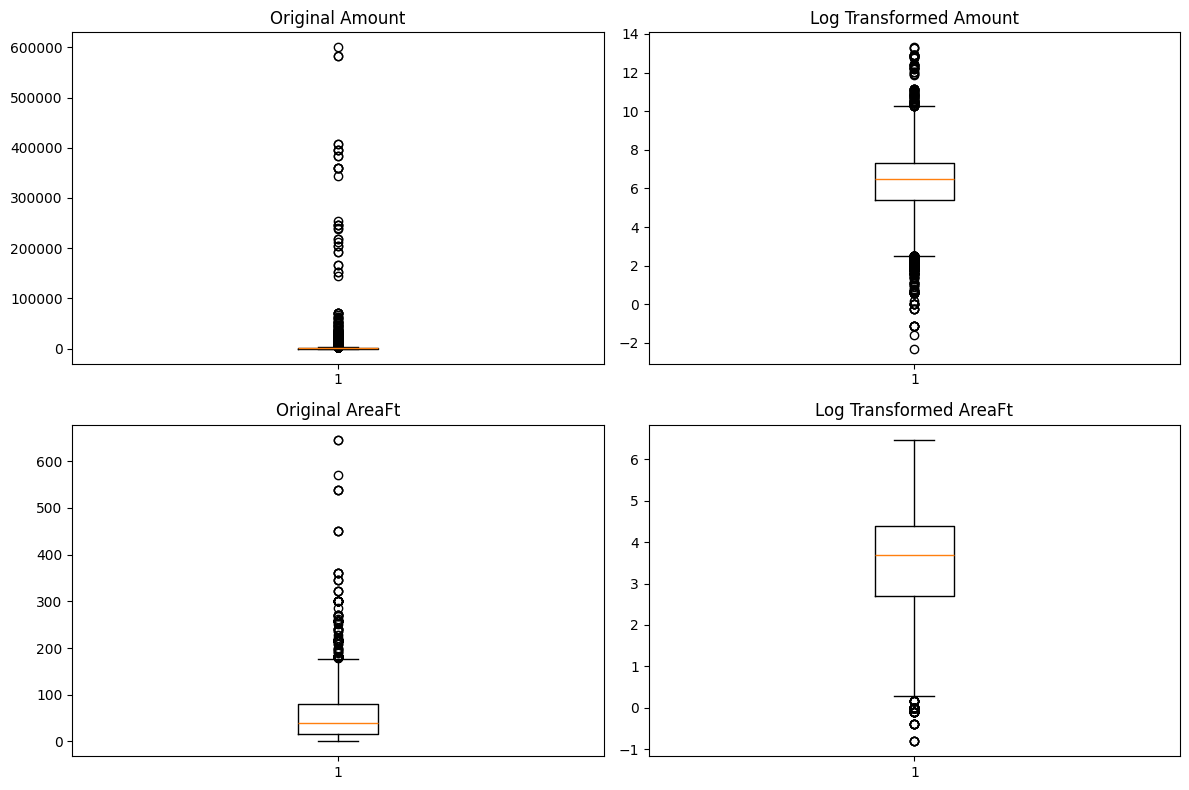

In [12]:
import matplotlib.pyplot as plt

# Create subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Boxplot for 'Amount'
axes[0, 0].boxplot(dataset_clean['Amount'].dropna())
axes[0, 0].set_title('Original Amount')

# Boxplot for 'Amount_log'
axes[0, 1].boxplot(dataset_clean['Amount_log'].dropna())
axes[0, 1].set_title('Log Transformed Amount')

# Boxplot for 'AreaFt'
axes[1, 0].boxplot(dataset_clean['AreaFt'].dropna())
axes[1, 0].set_title('Original AreaFt')

# Boxplot for 'AreaFt_log'
axes[1, 1].boxplot(dataset_clean['AreaFt_log'].dropna())
axes[1, 1].set_title('Log Transformed AreaFt')

# Adjust layout and display plots
plt.tight_layout()
plt.show()


In [13]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the log-transformed features
dataset_clean[['Amount_log', 'AreaFt_log']] = scaler.fit_transform(
    dataset_clean[['Amount_log', 'AreaFt_log']]
)


In [14]:
# Assuming 'CustomerCode' and 'Amount_log' are columns in your DataFrame
# Ensure 'CustomerCode' contains multiple identifiers for each customer

# Aggregate the total log-transformed amounts for each customer considering all CustomerCodes
customer_contribution = dataset_clean.groupby('CustomerCode')['Amount_log'].sum().reset_index()

# Calculate the total amount across all customers
total_amount = customer_contribution['Amount_log'].sum()

# Calculate the cumulative percentage of total amounts contributed by customers
customer_contribution['CumulativePercentage'] = customer_contribution['Amount_log'].cumsum() / total_amount * 100

# Find the thresholds for customer categorization
top_20_threshold = customer_contribution['CumulativePercentage'].quantile(0.20)
mid_60_threshold = customer_contribution['CumulativePercentage'].quantile(0.80)
mid_80_threshold = customer_contribution['CumulativePercentage'].quantile(0.95)

# Define a function to categorize customers into four levels based on their combined contribution
def categorize_customers(customer_id):
    contribution_percentage = customer_contribution[customer_contribution['CustomerCode'] == customer_id]['CumulativePercentage'].iloc[0]
    if contribution_percentage <= top_20_threshold:
        return 'Very Important'
    elif contribution_percentage <= mid_60_threshold:
        return 'Important'
    elif contribution_percentage <= mid_80_threshold:
        return 'Medium'
    else:
        return 'Low'

# Apply the categorization function to your dataset
dataset_clean['Contribution_Level'] = dataset_clean['CustomerCode'].apply(categorize_customers)


In [15]:
# Displaying the head of the DataFrame
dataset_clean.head()

,CustomerCode,CountryName,Amount,ITEM_NAME,ColorName,ShapeName,AreaFt,QualityName,FirstWord,Filteredcolor,FilteredQuality,Amount_log,AreaFt_log,Contribution_Level
0,H-1,USA,769.5,HAND TUFTED,GREEN/IVORY,REC,128.25,TUFTED 30C HARD TWIST,GREEN,GREEN,outlier,0.573361,0.778011,Important
1,H-1,USA,702.0,HAND TUFTED,BEIGE,REC,117.00,TUFTED 60C,BEIGE,BEIGE,outlier,0.567478,0.765403,Important
2,H-1,USA,616.0,HAND TUFTED,BEIGE/SAGE,REC,88.00,TUFTED 60C,BEIGE,BEIGE,outlier,0.559104,0.726284,Important
3,H-1,USA,616.0,HAND TUFTED,CHARCOAL,REC,88.00,TUFTED 60C,CHARCOAL,CHARCOAL,outlier,0.559104,0.726284,Important
4,H-1,USA,585.0,HAND TUFTED,NAVY/BEIGE,REC,117.00,TUFTED 60C,NAVY,NAVY,outlier,0.555796,0.765403,Important


In [16]:
# One-hot encoding categorical columns
#dataset_encoded = pd.get_dummies(dataset_clean, columns=['ITEM_NAME', 'ShapeName', 'Filteredcolor', 'FilteredQuality'], drop_first=True)
dataset_clean= pd.get_dummies(dataset_clean, columns=['ITEM_NAME', 'ShapeName', 'Filteredcolor', 'FilteredQuality'], drop_first=True)


In [17]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'Contribution_Level' is the column to be label encoded
# Initialize LabelEncoder
label_encoder = LabelEncoder()

dataset_clean['Contribution_Level_LabelEncoded'] = label_encoder.fit_transform(dataset_clean['Contribution_Level'])


# Assuming 'y' is a NumPy array
#y = dataset_clean['Contribution_Level_LabelEncoded'].values  # Convert to 1D array using .values

# Convert 'y' to a DataFrame
#y_df = pd.DataFrame(y, columns=['Contribution_Level_LabelEncoded'])


In [18]:
# Concatenate 'dataset_encoded', 'y_df', and 'dataset_clean'
#dataset_clean= pd.concat([dataset_encoded, y_df,dataset_clean], axis=1)

In [19]:
# Check the data types of columns in your DataFrame
dataset_clean.dtypes

CustomerCode                                  object
CountryName                                   object
Amount                                       float64
ColorName                                     object
AreaFt                                       float64
                                              ...   
FilteredQuality_JACQUARD SARI SILK+COTTON      uint8
FilteredQuality_JACQUARD SARI SILK+JUTE        uint8
FilteredQuality_TBL TUFTED MICROFIBRE          uint8
FilteredQuality_outlier                        uint8
Contribution_Level_LabelEncoded                int32
Length: 85, dtype: object

In [20]:
dataset_clean

,CustomerCode,CountryName,Amount,ColorName,AreaFt,QualityName,FirstWord,Amount_log,AreaFt_log,Contribution_Level,...,FilteredQuality_FLATWOVEN PVC YARN,FilteredQuality_FLATWOVEN SEAGRASS+COTTON,FilteredQuality_HAND WOVEN COTTON+LUREX,FilteredQuality_HAND WOVEN JUTE,FilteredQuality_HANDLOOM TENCIL VISC,FilteredQuality_JACQUARD SARI SILK+COTTON,FilteredQuality_JACQUARD SARI SILK+JUTE,FilteredQuality_TBL TUFTED MICROFIBRE,FilteredQuality_outlier,Contribution_Level_LabelEncoded
0,H-1,USA,769.5,GREEN/IVORY,128.2500,TUFTED 30C HARD TWIST,GREEN,0.573361,0.778011,Important,...,0,0,0,0,0,0,0,0,1,0
1,H-1,USA,702.0,BEIGE,117.0000,TUFTED 60C,BEIGE,0.567478,0.765403,Important,...,0,0,0,0,0,0,0,0,1,0
2,H-1,USA,616.0,BEIGE/SAGE,88.0000,TUFTED 60C,BEIGE,0.559104,0.726284,Important,...,0,0,0,0,0,0,0,0,1,0
3,H-1,USA,616.0,CHARCOAL,88.0000,TUFTED 60C,CHARCOAL,0.559104,0.726284,Important,...,0,0,0,0,0,0,0,0,1,0
4,H-1,USA,585.0,NAVY/BEIGE,117.0000,TUFTED 60C,NAVY,0.555796,0.765403,Important,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13130,P-5,USA,51.0,BLUE,80.0000,FLATWOVEN PET 60C 2PLY,BLUE,0.399468,0.713195,Important,...,0,0,0,0,0,0,0,0,1,0
13131,P-5,USA,41.0,BLUE,40.0000,FLATWOVEN PET 60C 2PLY,BLUE,0.385483,0.618001,Important,...,0,0,0,0,0,0,0,0,1,0
13132,P-5,USA,23.0,BLUE,108.0000,FLATWOVEN PET 60C 2PLY,BLUE,0.348443,0.754410,Important,...,0,0,0,0,0,0,0,0,1,0
13133,P-5,USA,22.0,BLUE,140.0000,FLATWOVEN PET 60C 2PLY,BLUE,0.345595,0.790050,Important,...,0,0,0,0,0,0,0,0,1,0


In [21]:
# Assuming 'combined_dataset' contains the encoded data

#file_path = r'C:\Users\Paris\My python stuff\Case study1\encoded_data.xlsx'

# Save the DataFrame to an Excel file at the specified file path
#dataset_clean.to_excel(file_path, index=False)  # Save the DataFrame to an Excel file without including the index


In [22]:

# Check for missing values in each column
print(dataset_clean.isnull().sum())


CustomerCode                                 0
CountryName                                  0
Amount                                       0
ColorName                                    0
AreaFt                                       0
                                            ..
FilteredQuality_JACQUARD SARI SILK+COTTON    0
FilteredQuality_JACQUARD SARI SILK+JUTE      0
FilteredQuality_TBL TUFTED MICROFIBRE        0
FilteredQuality_outlier                      0
Contribution_Level_LabelEncoded              0
Length: 85, dtype: int64


In [23]:
dataset_clean = dataset_clean.dropna()

In [24]:
# Assuming 'dataset_filtered_transformed' contains your dataset
# Selecting independent features and target
#X = dataset_clean.drop(columns=['Contribution_Level','CustomerCode', 'CountryName','Amount' ,'ITEM_NAME','ColorName',  'ShapeName','AreaFt', 'QualityName','FirstWord','Filteredcolor', 'FilteredQuality'])
#y = dataset_clean[['Contribution_Level_LabelEncoded']]  # Assuming these are your target variables
X = dataset_clean.drop(columns=['Contribution_Level','CustomerCode', 'CountryName','Amount' ,'ColorName',  'AreaFt', 'QualityName','FirstWord'])
y = dataset_clean[['Contribution_Level_LabelEncoded']]  # Assuming these are your target variables

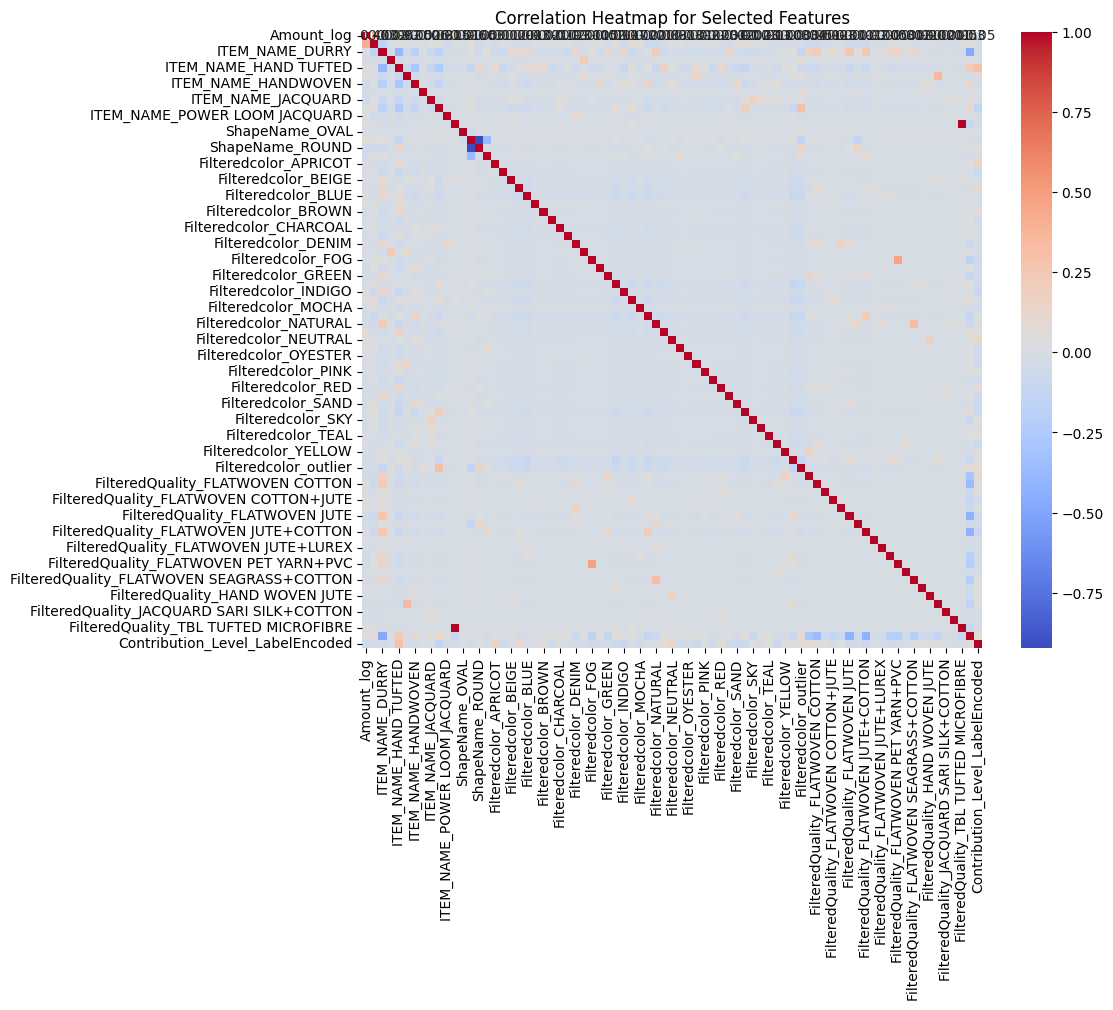

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X contains the specified features from your dataset
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Selected Features')
plt.show()


Decision Tree

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf = DecisionTreeClassifier(random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))



Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1664
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       279
           3       1.00      1.00      1.00       547

    accuracy                           1.00      2627
   macro avg       1.00      1.00      1.00      2627
weighted avg       1.00      1.00      1.00      2627



K-fold decision tree

In [28]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(random_state=1)

n_splits = 5  # You can adjust this number as needed

kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)

accuracy_scores = cross_val_score(dt_classifier, X, y, cv=kf, scoring='accuracy')

print("Accuracy scores for each fold:", accuracy_scores)
mean_accuracy = accuracy_scores.mean()
print("Mean accuracy:", mean_accuracy)


Accuracy scores for each fold: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


Random forest

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Convert the target variable y_train and y_test to 1D arrays
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=1)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
# Calculate the classification report with zero division handling
classification_report = classification_report(y_test, y_pred, zero_division=0)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1664
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       279
           3       1.00      1.00      1.00       547

    accuracy                           1.00      2627
   macro avg       1.00      1.00      1.00      2627
weighted avg       1.00      1.00      1.00      2627



Random forest with bootstrap Aggregating 

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, and y_test are your training and test sets

rf_classifier = RandomForestClassifier(n_estimators=50, random_state=1)  # You can adjust n_estimators and other hyperparameters
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1664
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       279
           3       1.00      1.00      1.00       547

    accuracy                           1.00      2627
   macro avg       1.00      1.00      1.00      2627
weighted avg       1.00      1.00      1.00      2627



KNN with k=5

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report



y = y.values.ravel()  # Assuming y is a DataFrame, convert it to a NumPy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can set different values for n_neighbors

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y_test, y_pred, zero_division=1)

print(f"Classification Report:\n{classification_rep}")


AttributeError: 'numpy.ndarray' object has no attribute 'values'

KNN with tunned K

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are defined previously

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Example values for k

# Instantiate GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Train the KNN classifier using the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Model Evaluation on Testing Set
y_pred = knn_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_result = classification_report(y_test, y_pred,zero_division=1)

print("Best k value:", best_k)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_result)


Best k value: 3
Accuracy: 0.9977160258850399
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1664
           1       1.00      1.00      1.00       137
           2       1.00      0.98      0.99       279
           3       0.99      1.00      0.99       547

    accuracy                           1.00      2627
   macro avg       1.00      0.99      1.00      2627
weighted avg       1.00      1.00      1.00      2627



In [41]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Assuming X and y are defined previously

# Create KNN classifier
knn = KNeighborsClassifier()

# Define the parameter grid for tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Example values for k

# Instantiate GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best hyperparameters
best_k = grid_search.best_params_['n_neighbors']

# Train the KNN classifier using the best k value
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X, y)

# Perform k-fold cross-validation for evaluation
cv_scores = cross_val_score(knn_best, X, y, cv=5)
mean_accuracy = cv_scores.mean()

# Model Evaluation using k-fold Cross Validation
print("Best k value:", best_k)
print(f"Mean Accuracy using {cv_scores.shape[0]}-fold Cross Validation:", mean_accuracy)

# Additional Evaluation on Training Set (for demonstration purposes)
y_pred = knn_best.predict(X)
classification_result = classification_report(y, y_pred, zero_division=1)
print("Classification Report on Training Set:\n", classification_result)


Best k value: 3
Mean Accuracy using 5-fold Cross Validation: 0.990557080363244
Classification Report on Training Set:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      8394
           1       1.00      1.00      1.00       664
           2       1.00      1.00      1.00      1264
           3       1.00      1.00      1.00      2809

    accuracy                           1.00     13131
   macro avg       1.00      1.00      1.00     13131
weighted avg       1.00      1.00      1.00     13131



logestic Regression

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are defined previously

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create Logistic Regression classifier with increased max_iter
logistic = LogisticRegression(max_iter=2000)  # Adjust max_iter as needed

# Define the parameter grid for tuning
param_grid = {'C': [0.1, 1, 10, 100]}  # Example values for regularization parameter

# Instantiate GridSearchCV
grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_C = grid_search.best_params_['C']

# Train the Logistic Regression classifier using the best C value
logistic_best = LogisticRegression(C=best_C, max_iter=2000)  # Adjust max_iter as needed
logistic_best.fit(X_train, y_train)

# Model Evaluation on Testing Set
y_pred = logistic_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_result = classification_report(y_test, y_pred, zero_division=1)

print("Best C value:", best_C)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_result)



Best C value: 1
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1664
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       279
           3       1.00      1.00      1.00       547

    accuracy                           1.00      2627
   macro avg       1.00      1.00      1.00      2627
weighted avg       1.00      1.00      1.00      2627



In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create Logistic Regression classifier
logistic = LogisticRegression(max_iter=2000)  # Increase max_iter as needed
logistic.fit(X_train, y_train)

# Model Evaluation on Testing Set
y_pred = logistic.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_result = classification_report(y_test, y_pred, zero_division=1)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_result)


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1664
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       279
           3       1.00      1.00      1.00       547

    accuracy                           1.00      2627
   macro avg       1.00      1.00      1.00      2627
weighted avg       1.00      1.00      1.00      2627



SVM

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, and y_test are your training and test sets
# Create the model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred, zero_division=1)

# Display results or print them
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)



Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1664
           1       1.00      1.00      1.00       137
           2       1.00      1.00      1.00       279
           3       1.00      1.00      1.00       547

    accuracy                           1.00      2627
   macro avg       1.00      1.00      1.00      2627
weighted avg       1.00      1.00      1.00      2627



In [36]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


Neural Network

In [37]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, and y_test are your training and test sets

# Create a Sequential model
model = Sequential()

# Add layers to the model (adjust the number of units and activation functions based on your problem)
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(4, activation='softmax'))  # Output layer with 4 neurons for 4 classes (adjust as needed)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_test, y_test))

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = tf.argmax(y_pred_proba, axis=1)  # Convert predicted probabilities to class labels

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

# Display results or print them
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report)





Epoch 1/10


329/329 [==============================] - 3s 4ms/step - loss: 0.3147 - accuracy: 0.9075 - val_loss: 0.0556 - val_accuracy: 0.9977
Epoch 2/10
329/329 [==============================] - 1s 3ms/step - loss: 0.0219 - accuracy: 0.9995 - val_loss: 0.0084 - val_accuracy: 1.0000
Epoch 3/10
329/329 [==============================] - 1s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 4/10
329/329 [==============================] - 1s 3ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 9.6329e-04 - val_accuracy: 1.0000
Epoch 5/10
329/329 [==============================] - 1s 3ms/step - loss: 6.0351e-04 - accuracy: 1.0000 - val_loss: 4.6882e-04 - val_accuracy: 1.0000
Epoch 6/10
329/329 [==============================] - 1s 3ms/step - loss: 3.1187e-04 - accuracy: 1.0000 - val_loss: 2.6249e-04 - val_accuracy: 1.0000
Epoch 7/10
329/329 [==============================] - 1s 3ms/step - loss: 1.8455e-04 - accuracy: 1.0000 - val_loss: 1.6623e

n_estimators: Number of trees in the forest. You can adjust this parameter based on your requirements. A higher number generally leads to better performance but increases computation time.
random_state: Controls the randomness of the estimator. Providing a value for random_state ensures reproducibility of the results.
Adjust the hyperparameters according to your specific problem and data characteristics.

This code sets up a Random Forest classifier using scikit-learn (RandomForestClassifier), fits the model to the training data (X_train, y_train), makes predictions on the test data (X_test), and evaluates the model's performance using accuracy and a classification report.

kmean clustering- with all features(it is not possible, beacause concatanate of numeric and categorical not possible)

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X contains your dataset (features)

# Choose the number of clusters (k)
num_clusters = 4  # You can adjust the number of clusters based on your data

# Create a KMeans instance
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the KMeans model to your data
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters (for demonstration with 2D data)
# Note: This visualization works only for 2D data; adjust accordingly for higher dimensions
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolors='black')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()


C:\Users\Paris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


InvalidIndexError: (slice(None, None, None), 0)

kmean clustering- with 2 numeric features

C:\Users\Paris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


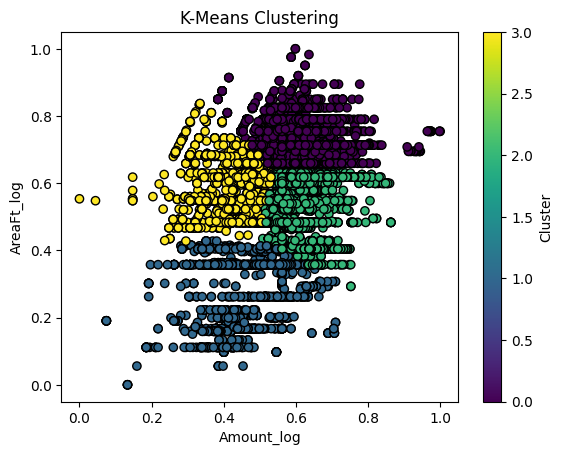

In [48]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the dataset
# Example: data = pd.read_csv('your_dataset.csv')

# Select the features for clustering
selected_features = dataset_clean[['Amount_log', 'AreaFt_log']]

# Choose the number of clusters (k)
num_clusters = 4  

# Create a KMeans instance
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the KMeans model to your selected features
kmeans.fit(selected_features)

# Get cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters (assuming 2D data)
plt.scatter(selected_features['Amount_log'], selected_features['AreaFt_log'], c=cluster_labels, cmap='viridis', marker='o', edgecolors='black')
plt.title('K-Means Clustering')
plt.xlabel('Amount_log')
plt.ylabel('AreaFt_log')
plt.colorbar(label='Cluster')
plt.show()
